In [1]:
import pandas
%matplotlib inline

In [5]:
### 
numerical_columns = ["col {}".format(el) for el in range(50)]



In [37]:
heartrate_file = pandas.read_csv("results/Rri_igor__2022-05-06T09_51_26.636408.csv",
                                 names = ["time","rri", "error"]+ numerical_columns)

In [69]:
only_time = heartrate_file[numerical_columns].stack()


from ipywidgets import interact, IntSlider
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(only_time), value = len(only_time)), offset = IntSlider(min=0, max = len(only_time), value = 0)):

    only_time.iloc[ffrom+offset:tto+offset].plot(ylim = (0,2500))

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=27550, description='t…

In [63]:

#hp.plotter(working_data, measures)
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(only_time), value = len(only_time)), offset = IntSlider(min=0, max = len(only_time), value = 0)):
    
    working_data, measures = hp.process(np.array(only_time)[ffrom+offset:tto+offset], 250.0)
    hp.plotter(working_data, measures)
    #only_time.iloc[ffrom+offset:tto+offset].plot(ylim = (0,2500))

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=27550, description='t…

In [67]:
len(just_heart)

27550

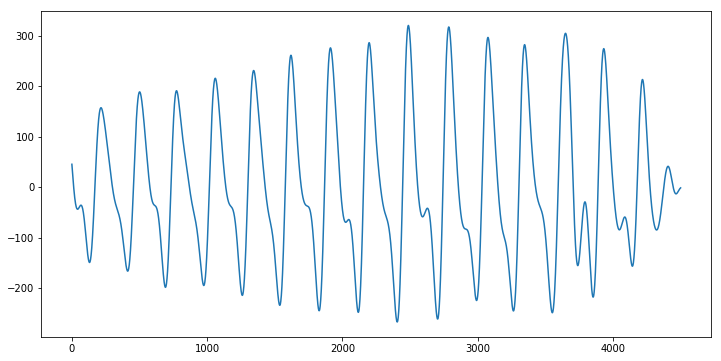

In [80]:
import matplotlib.pyplot as plt

sample_rate = 250
just_heart = np.array(only_time)[1500:6000]
filtered_ppg = hp.filter_signal(just_heart, 
                                cutoff = [0.8, 2.5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

#And let's plot the same segment as under 'zoomed in!' above
plt.figure(figsize=(12,6))
plt.plot(filtered_ppg)
#plt.plot(filtered_ppg[0:((2*60)*32)])
plt.show()



bpm: 52.470485
ibi: 1143.500000
sdnn: 34.156677
sdsd: 31.201199
rmssd: 57.120655
pnn20: 0.769231
pnn50: 0.461538
hr_mad: 14.500000
sd1: 40.390256
sd2: 29.686129
s: 3766.864977
sd1/sd2: 1.360577
breathingrate: 0.249859


<Figure size 864x432 with 0 Axes>

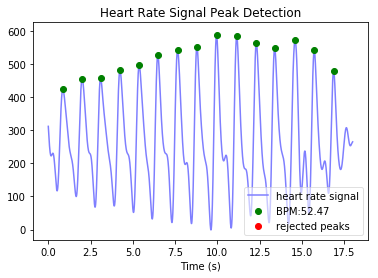

In [84]:
wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
plt.figure(figsize=(12,6))
hp.plotter(wd, m)


for key in m.keys():
    print('%s: %f' %(key, m[key]))


In [86]:
wd

{'hr': array([311.61991223, 308.02748442, 304.43378354, ..., 264.331919  ,
        264.58726314, 264.82034473]),
 'sample_rate': 250,
 'peaklist': [215.0,
  500.75,
  773.0,
  1059.75,
  1343.25,
  1619.0,
  1911.0,
  2197.0,
  2486.75,
  2785.25,
  3075.0,
  3346.0,
  3648.25,
  3931.0,
  4217.25],
 'ybeat': [423.68297097278025,
  455.1206375229126,
  457.3501843728826,
  482.04039010192105,
  497.43095088658606,
  527.6302999270604,
  542.2953044791118,
  552.5884703120914,
  586.7293072882936,
  583.7635239187367,
  563.0240446792027,
  548.6616576721217,
  571.251333917586,
  540.7719883633654,
  479.6084690707928],
 'rolling_mean': array([318.06747819, 318.06747819, 318.06747819, ..., 360.07038559,
        360.07038559, 360.07038559]),
 'RR_list': array([1143., 1089., 1147., 1134., 1103., 1168., 1144., 1159., 1194.,
        1159., 1084., 1209., 1131., 1145.]),
 'RR_indices': [(215.0, 500.75),
  (500.75, 773.0),
  (773.0, 1059.75),
  (1059.75, 1343.25),
  (1343.25, 1619.0),
  (1619

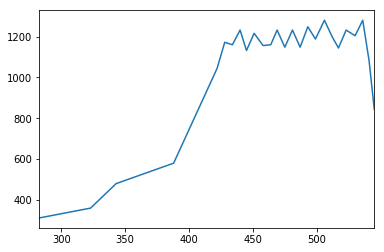

In [44]:
### RRI

heartrate_rri = heartrate_file[["time","rri"]]
heartrate_rri_non = heartrate_rri[heartrate_file["rri"]!=0]
heartrate_rri_non["rri"].plot()

In [47]:
import heartpy as hp

hrdata = hp.get_data('data.csv')
#This ret

OSError: data.csv not found.

In [55]:
#!pip install heartpy

data, _ = hp.load_exampledata(0) #this example set is sampled at 100Hz
pandas.DataFrame(data)

,0
0,530.0
1,518.0
2,506.0
3,494.0
4,483.0
...,...
2478,489.0
2479,491.0
2480,492.0
2481,493.0


In [59]:
import numpy as np

np.array(only_time)

array([5000, 5000, 5000, ..., 1178, 1225, 1204])

In [93]:
heartrate_file = pandas.read_csv("prof_igor__2022-04-27T08_45_26.840386.csv",names = ["time","heartrate"])

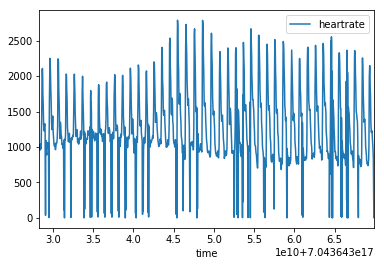

In [94]:
heartrate_file["filtered"]= heartrate_file["heartrate"]


heartrate_file.plot(x="time",y="heartrate")

In [95]:
from ipywidgets import interact, IntSlider

In [96]:
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(heartrate_file), value = len(heartrate_file)), offset = IntSlider(min=0, max = len(heartrate_file), value = 0)):
    heartrate_file.iloc[ffrom + offset:tto + offset].plot(y="heartrate",ylim = (0,2500)) # ,style='.'

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=1316, description='tt…

In [29]:
29588568000 /1000000000

29.588568

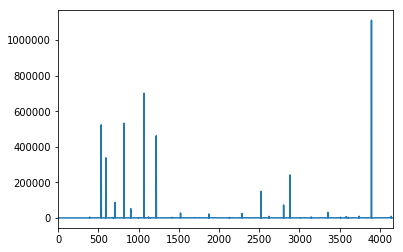

In [9]:
heartrate_file["heartrate"].plot()